# Exploratory data analysis

EDA of dataframe created by handling missing values from the original dataset

Importing modules and loading datasets

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,recall_score

warnings.filterwarnings('ignore')

In [94]:
df = pd.read_csv('../data/interim/clean.csv')

In [95]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [96]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3989.000000,3989.000000,3989.000000,3989.000000,3989.000000,3989.000000,3989.000000,3989.000000,3989.000000,3989.000000,3989.000000,3989.000000,3989.000000,3989.000000,3989.000000,3989.000000
mean,0.433191,49.473803,1.982452,0.491101,8.504888,0.029331,0.005515,0.309601,0.025320,235.741038,131.651416,82.678616,25.650541,75.772123,80.026410,0.149160
std,0.495579,8.532381,1.020695,0.499983,10.597084,0.168753,0.074068,0.462387,0.157114,39.279071,19.338250,10.438553,3.466154,10.704613,11.492301,0.356291
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,170.000000,104.000000,66.000000,20.060000,60.000000,62.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.060000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,79.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,143.500000,89.500000,27.990000,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1.000000,312.000000,175.000000,104.500000,32.760000,98.000000,107.000000,1.000000


## Univariate analysis

I already made some univariate analysis in the data preparation notebook but I will do some more in this notebook since there's some modifications previously made in the data.

### Distribution of the target variable (TenYearCHD)

<Axes: xlabel='TenYearCHD', ylabel='count'>

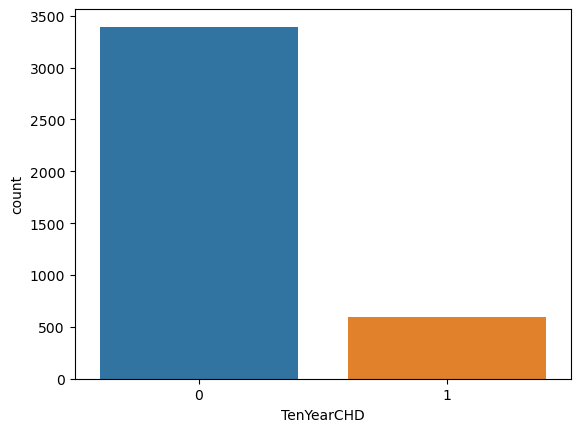

In [97]:
sns.countplot(df,x='TenYearCHD')

The target variable TenYearCHD is very imbalanced. So probably we'll need to oversample for the prediction model to accurately work.

Let's see how much unbalanced the data is.

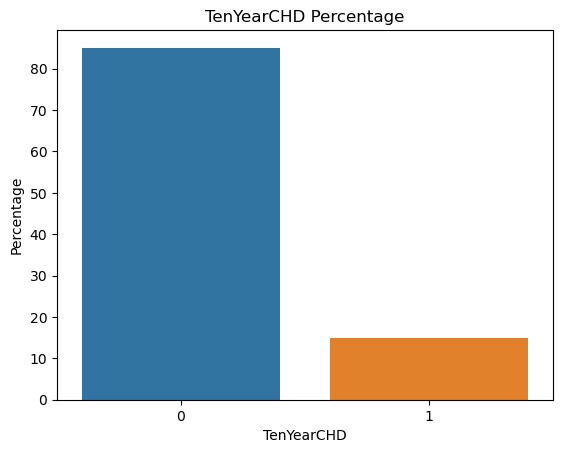

In [98]:
TenYearCHD_percentage = df['TenYearCHD'].value_counts(normalize=True)*100
sns.barplot(x=TenYearCHD_percentage.index,y=TenYearCHD_percentage.values)
plt.xlabel('TenYearCHD')
plt.ylabel('Percentage')
plt.title('TenYearCHD Percentage')
plt.show()

In [99]:
#Let's see in numbers how much is imbalanced the dataset.
classes_count = df['TenYearCHD'].value_counts()
classes_count[0]/classes_count[1]

5.704201680672269

There's a ratio of approximately 5:1

In [100]:
#Making a copy of the dataframe.
smote_df = df.copy()

#Assigning values to X and y
X = smote_df.drop(['TenYearCHD'], axis=1)
y = smote_df['TenYearCHD']

#Instantiating and applying SMOTE model.
sm = SMOTE(random_state=42,k_neighbors=3)
X_res,y_res = sm.fit_resample(X,y)

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

In [101]:
confusion_matrix(y_test, y_pred)

array([[635,  52],
       [ 79, 592]])

In [102]:
recall_score(y_test, y_pred)

0.8822652757078987

Those are the best metrics i got after making experiments with differents parameters.

In [103]:
y.shape

(3989,)

### Distribution of others variables.

Since some data is binary and some is continuous we need to show first the binary variables as countplots and then the continuous variables as histograms.

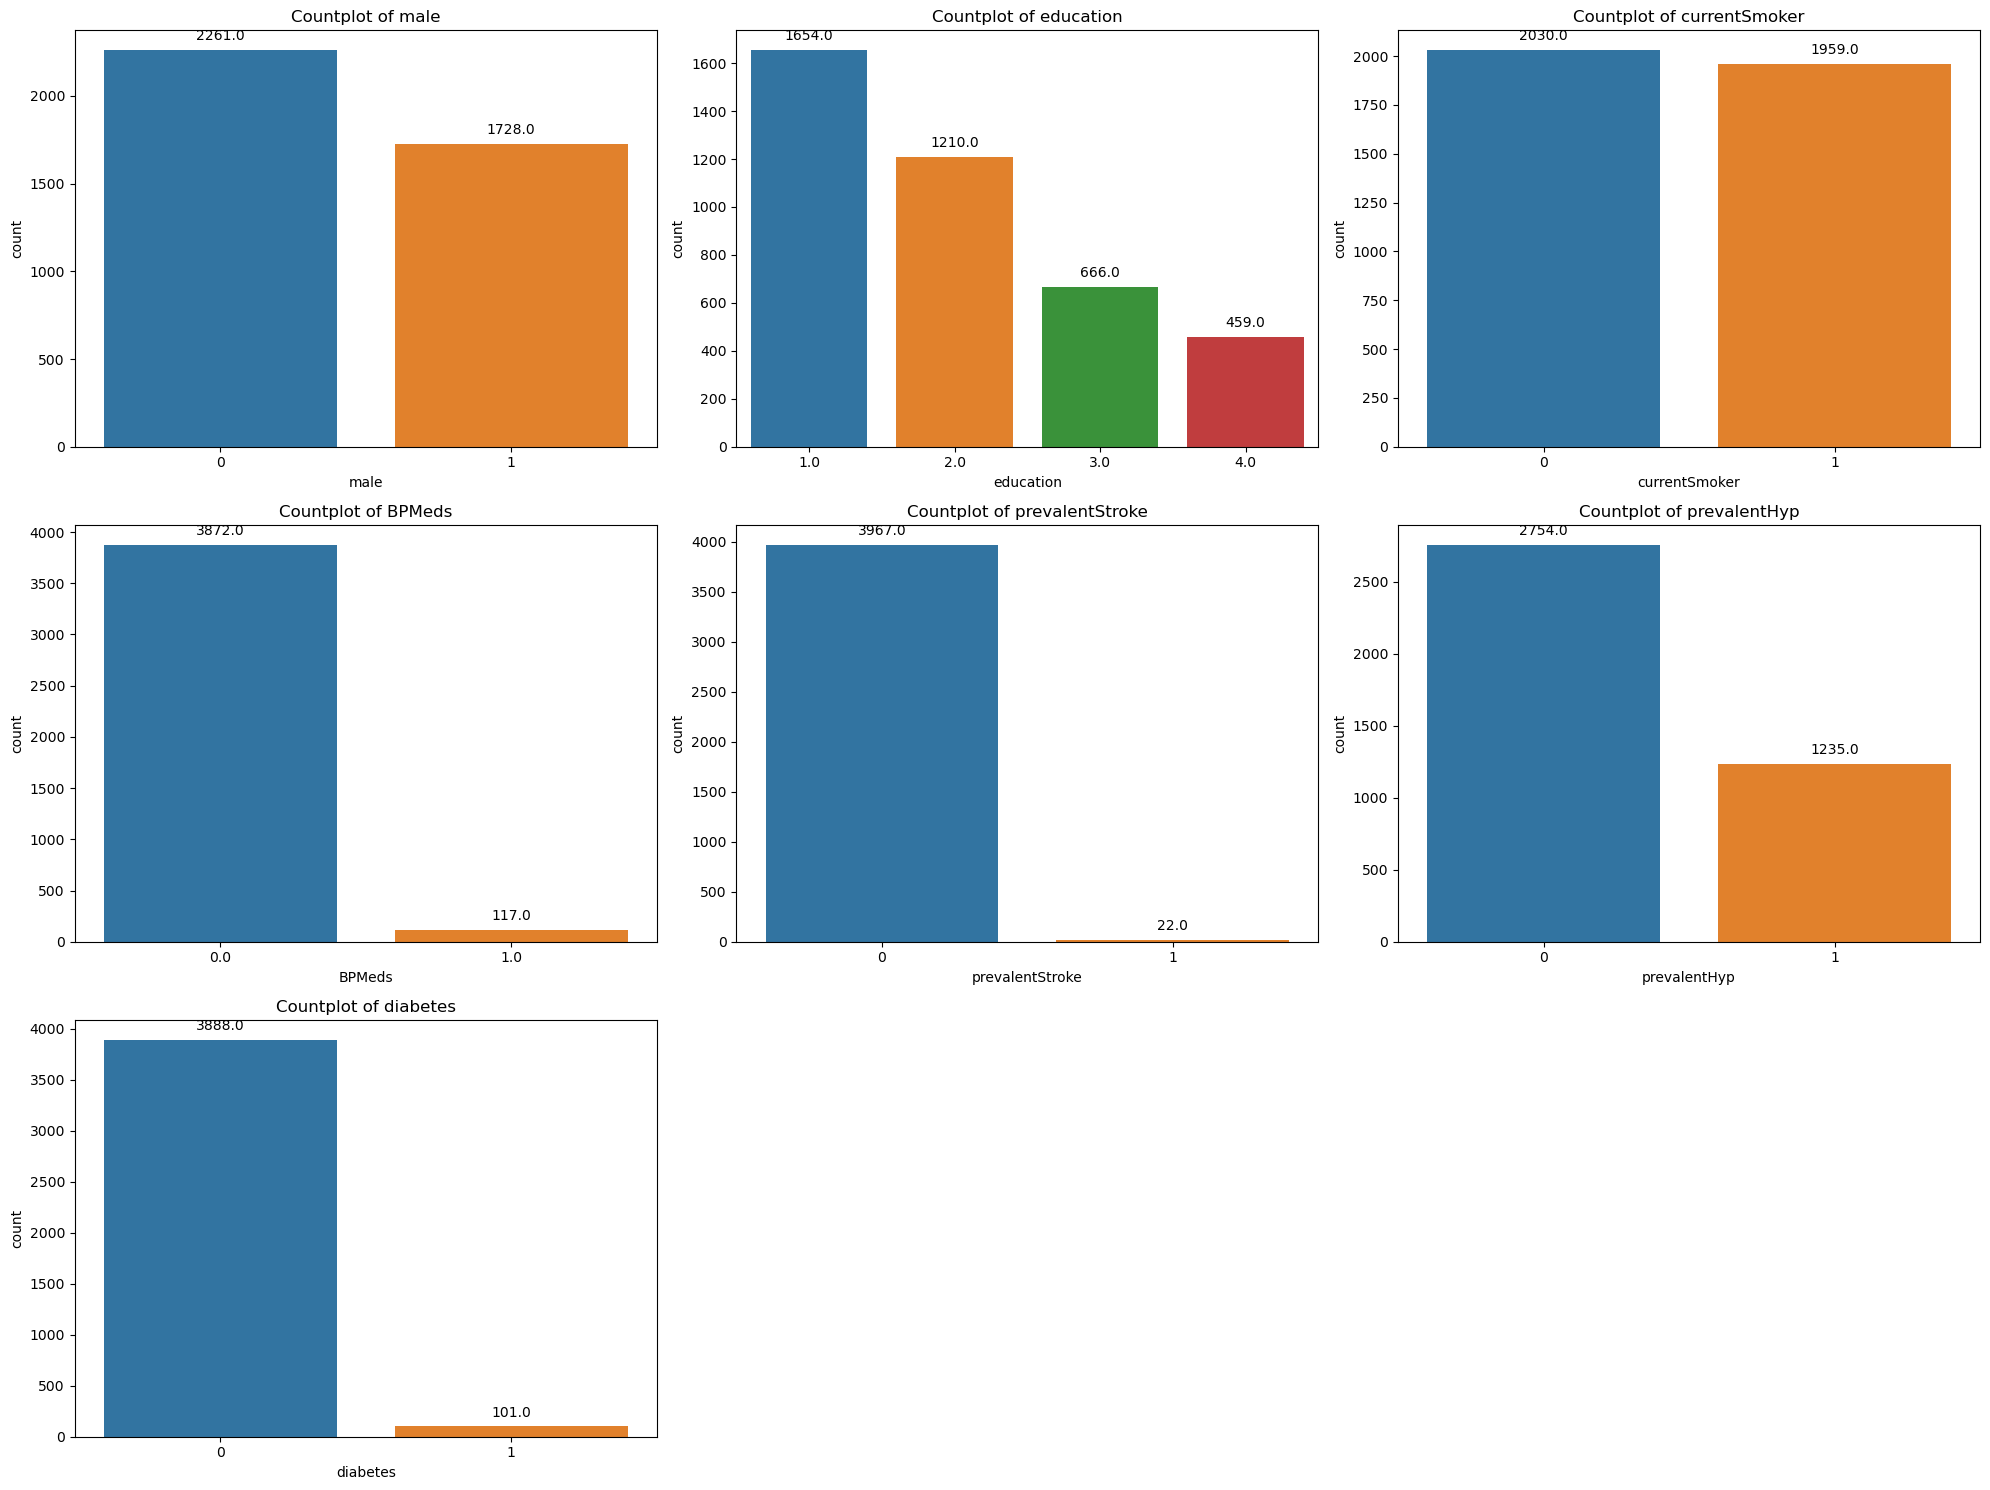

In [104]:
#Visualization of categorical variables
df2 = df.drop(columns=['age','totChol','sysBP','diaBP','BMI','heartRate','TenYearCHD','glucose','cigsPerDay'])

plt.figure(figsize=(20,15))

for i,col in enumerate(df2.columns,1):
    plt.subplot(3,3,i)
    
    unique_vals = sorted(df2[col].unique())
    
    ax = sns.countplot(x=col, data=df2, order=unique_vals)
    
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}',
                    (p.get_x() + p.get_width() /2., p.get_height()),
                    ha = 'center', va='center',
                    xytext=(0,10),
                    textcoords='offset points')
        plt.title(f'Countplot of {col}')
        plt.tight_layout()

plt.show()

We have very imbalanced data in some variables. Theoretically this variables are important for CHD prediction, however, since the objective of the project is not to get more data, and we actually don't know the characteristics and inclusion criteria of the persons the data was taken, I won't look or scrape for new data. On the contrary, probably will be better to ignore some of this categories.

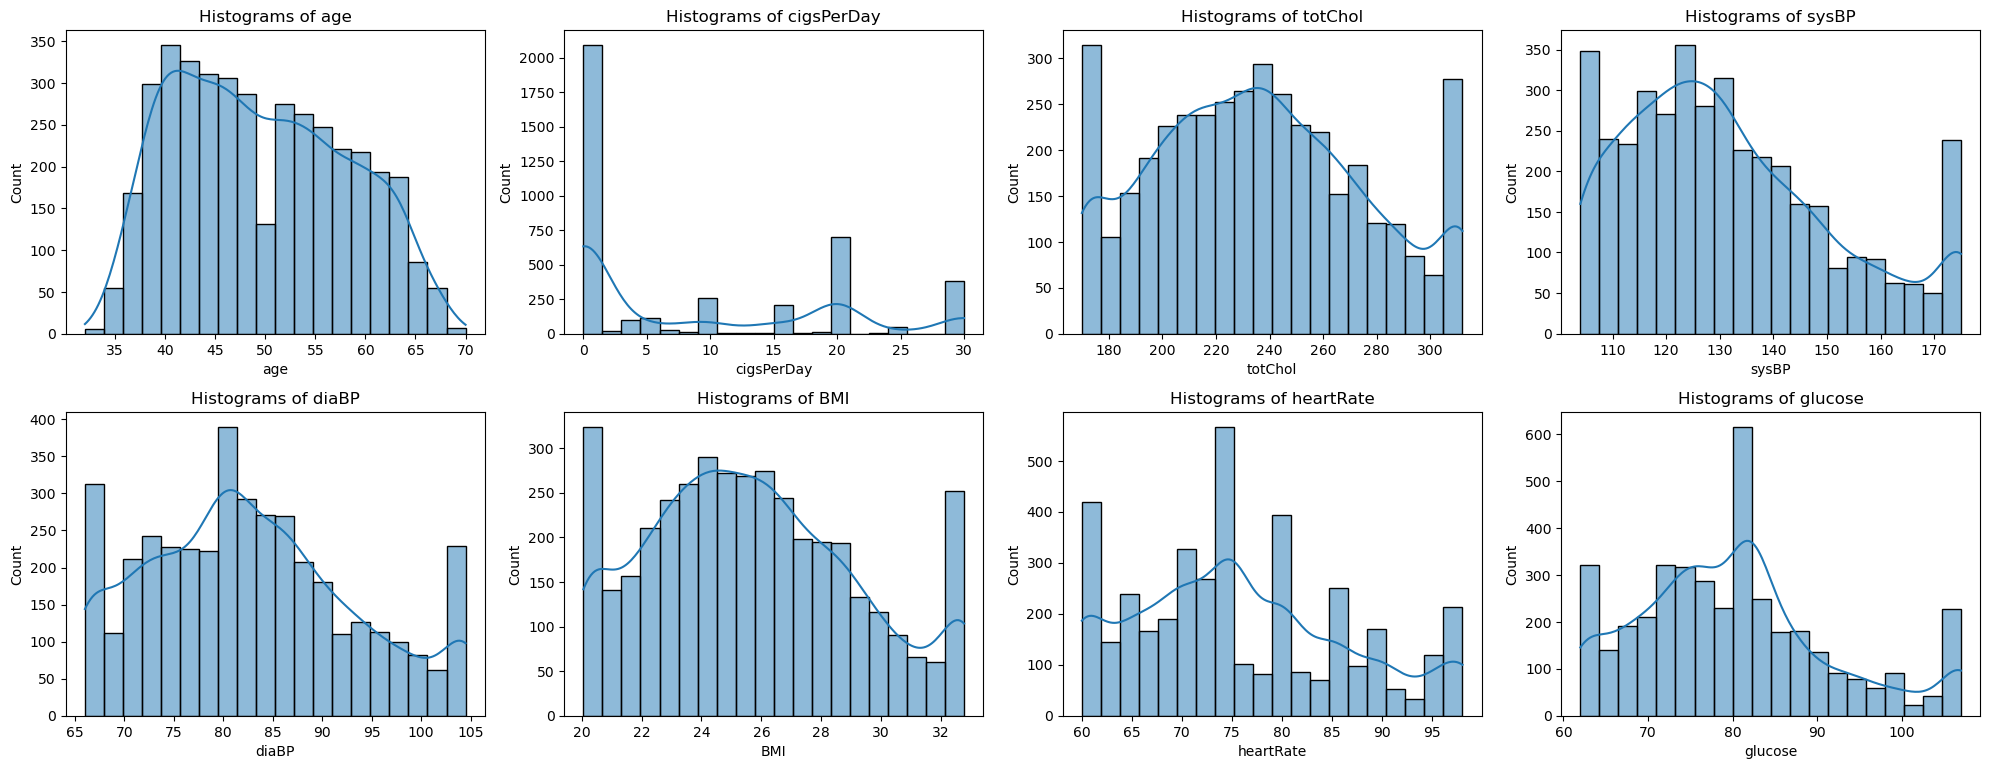

In [105]:
#Visualization of continuous variables.
df3 = df.drop(columns=['TenYearCHD','male','education','currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes'])

plt.figure(figsize=(20,15))
for i,col in enumerate(df3.columns,1):
    plt.subplot(4,4,i)
    sns.histplot(df3[col],kde=True,bins=20)
    plt.title(f'Histograms of {col}')
    plt.tight_layout()
    
plt.show()

There's very uneven data of the continues variables. Most of them probably would have a normal distribution if we would have more data. Also, since we used IQR to deal with outliers, there's somo increments in the tails of the distributions.

## Correlation of variables

Text(0.5, 1.0, 'Correlation beetwen features')

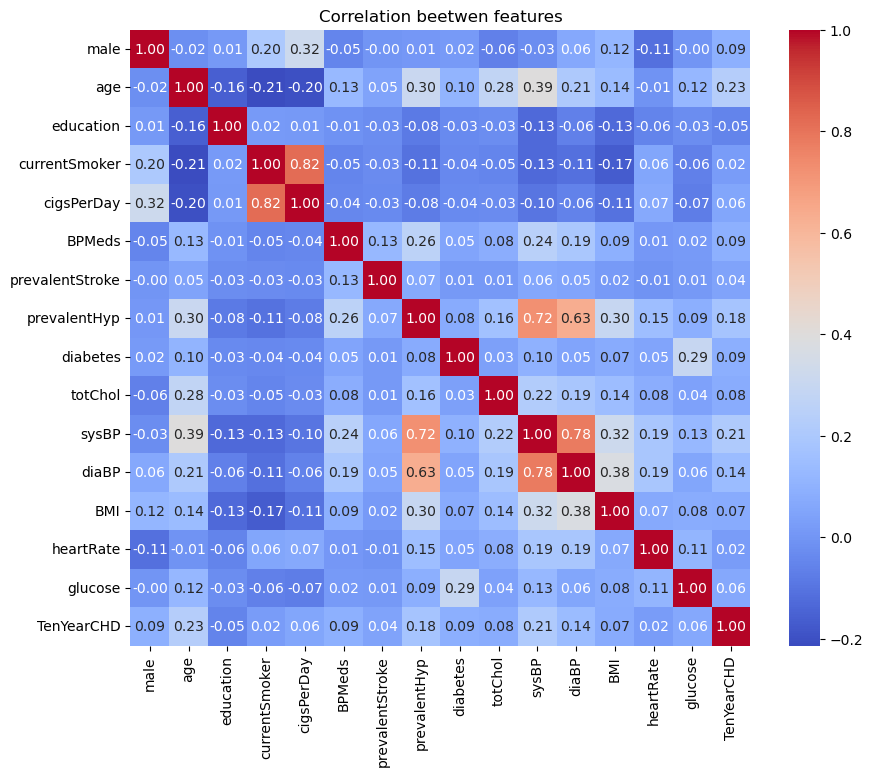

In [106]:
correlation = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation,annot=True,fmt='.2f',cmap='coolwarm')
plt.title('Correlation beetwen features')

From this heatmap I can make the following observations:
- Being a male is slightly correlated with currently being smoker and therefore with the number of cigarrettes per day.
- Age is inversely correlated with being smoker, so would be interest to see if that implies that older people in the dataset are less likely to be women.
- Age is correlated with several variables known in the medicine to be risk factors for CHD, including TenYearCHD itself.
- Education shows very few correlation with the others features, it seems like the older individuals in the dataset present fewer education degree, this is a characteristic of the population the data was taken.
- Current smoker and CigsPerDay are highly correlated, also CigsPerDay is slightly more correlated to TenYearCHD, seeing the context, Current smoker variable could be dropped off for the prediction model, because CigsPerDay more than 0 implies than it is a Current smoker person.
- 
It seems that age and SysBP are correlated so let's take a look on this.

<Figure size 1200x800 with 0 Axes>

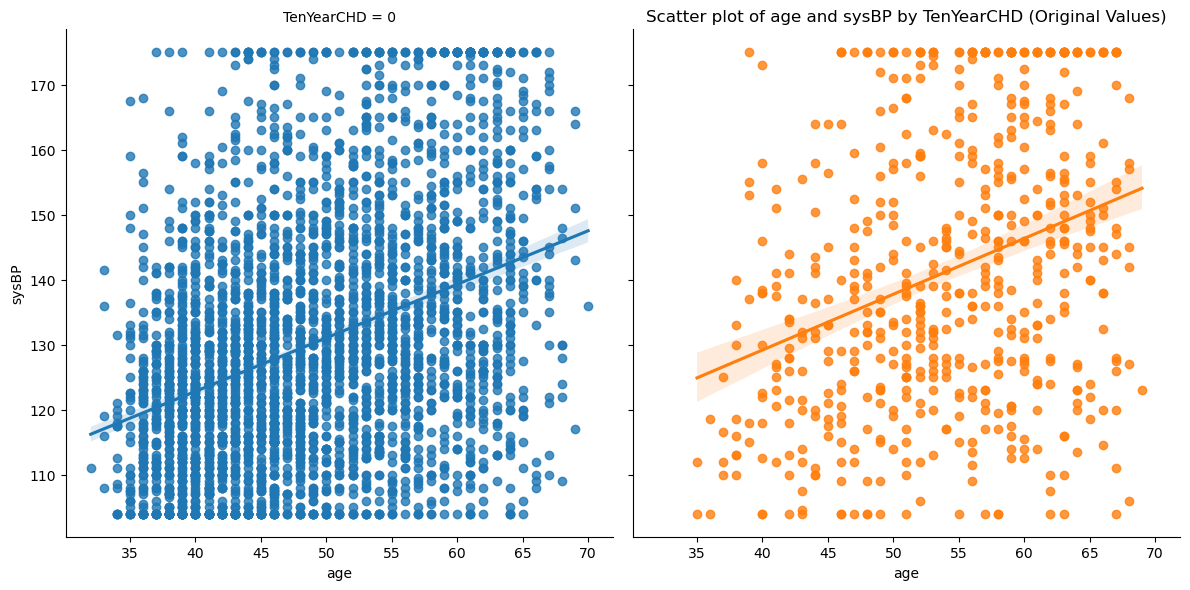

In [113]:
plt.figure(figsize=(12,8))
sns.lmplot(data=df,x='age',y='sysBP',hue='TenYearCHD',col='TenYearCHD',height=6)
plt.title('Scatter plot of age and sysBP by TenYearCHD (Original Values)')
plt.show()

It seems that the systolic preasure increases as age increases, also,in general the TenYearCHD positive individuals are distributed at higher systolic preasure levels. However there's a significant overlap between the two groups and it is not showed an important difference between the systolic preasure levels of the two groups and the presence of Ten Year CHD. 
Now let's see the relationship between the diastolic preasure and the age of the patients.

Text(0.5, 1.0, 'Scatter plot of age and diaBP by TenYearCHD')

<Figure size 1200x800 with 0 Axes>

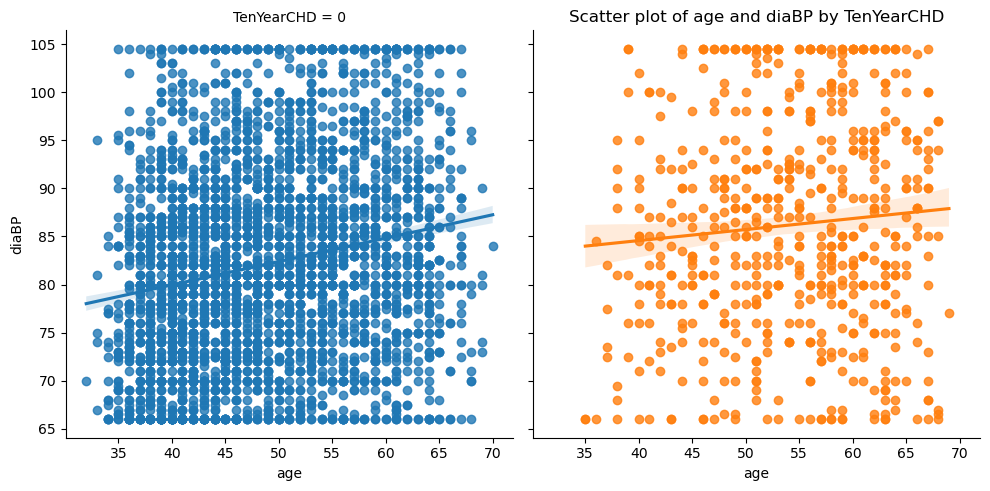

In [108]:
plt.figure(figsize=(12,8))
sns.lmplot(data=df,x='age',y='diaBP',hue='TenYearCHD', col='TenYearCHD')
plt.title('Scatter plot of age and diaBP by TenYearCHD')

Now let's consider the relations beetween glucose levels, diabetes and the TenYearCHD variable.

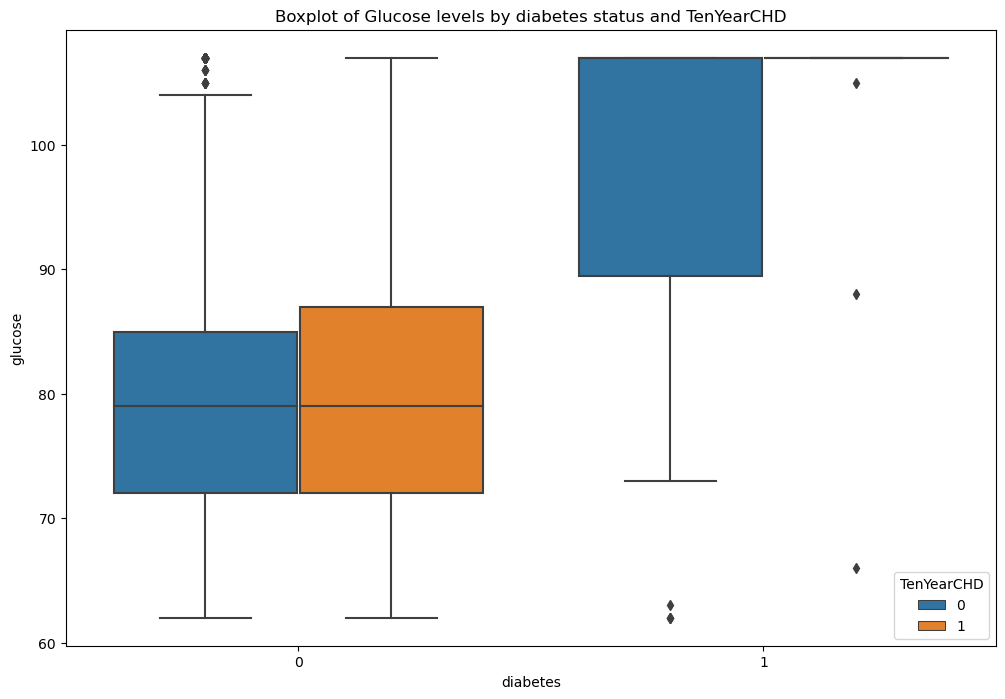

In [109]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df,x='diabetes',y='glucose',hue='TenYearCHD')
plt.title('Boxplot of Glucose levels by diabetes status and TenYearCHD')
plt.show('Scatter plot ')

As expected individuals with diabetes have greater glucose levels that individuals without diabetes, but most important observation, the individuals with diabetes have a higher incidence of coronary heart disease in ten years when they have a higher glucose level than those with diabetes and low glucose level.

Systolic and diastolic blood pressure are two important parameters for diagnosing heart disease. I'll create a new variable called "BP_mean" that will be the constant blood pressure value that, with the same peripheral resistance, would produce the same flow rate (cardiac minute volume) that generates the variable blood pressure.

In [110]:
BP_mean = ((df['diaBP']*2)+df['sysBP'])/3

In order to analyse wether is more relevant BP_mean or the interactions between sysBP and diaBP, we will show those relations in a scatter plot.

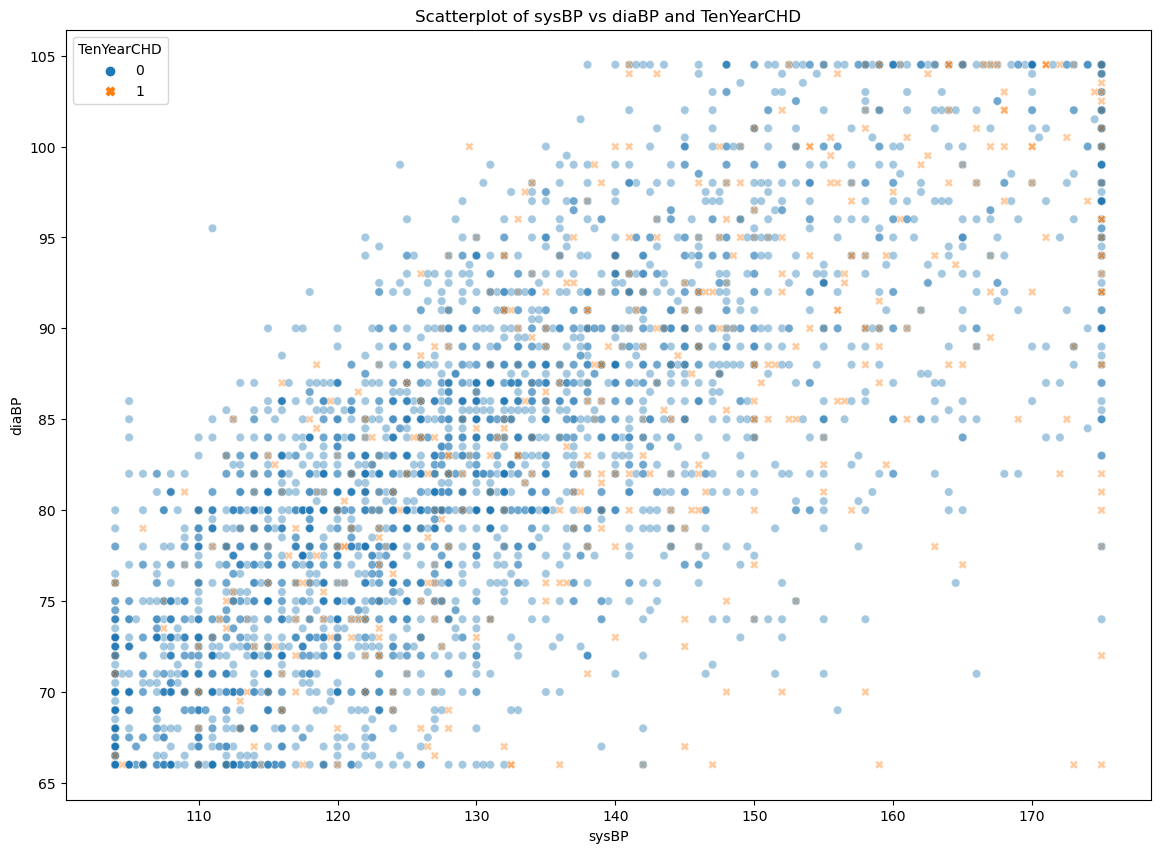

In [111]:
plt.figure(figsize=(14,10))
sns.scatterplot(data=df,x='sysBP',y='diaBP',hue='TenYearCHD',alpha=0.4, style='TenYearCHD')
plt.title('Scatterplot of sysBP vs diaBP and TenYearCHD')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1400x1000 with 0 Axes>

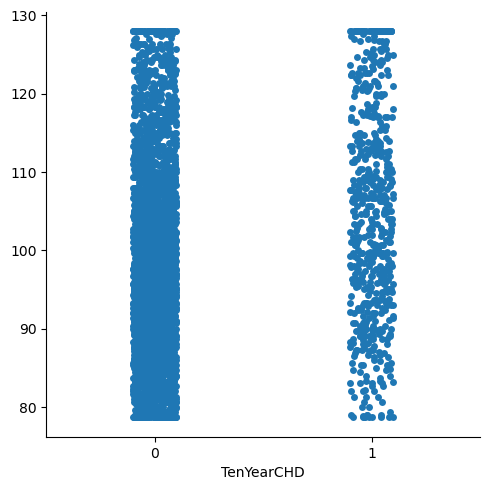

In [112]:
plt.figure(figsize=(14,10))
sns.catplot(data=df,x='TenYearCHD', y=BP_mean)
plt.show